<a href="https://colab.research.google.com/github/kk890528/python-work/blob/master/CNN%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [84]:
x_train.shape

(60000, 28, 28)

In [0]:
class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Text(0.5, 1.0, 'Dress')

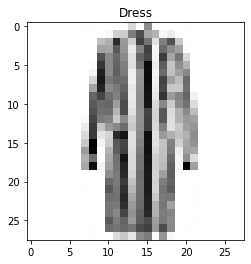

In [86]:
plt.imshow(x_train[1450],cmap='Greys')
plt.title(class_name[y_train[1450]])

### 一個Channel，所以(28,28,1)

In [0]:
x_train=x_train.reshape(60000,28,28,1)/255

In [0]:
x_test=x_test.reshape(10000,28,28,1)/255

In [89]:
x_train[87].shape

(28, 28, 1)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

### 讀入必要函式

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD

# Step1 打造函數學習機(CNN)
## fitler改成50，100，200
## Convolution layer一樣三層，但改成4x4


In [0]:
model=Sequential()

In [0]:
model.add(Conv2D(50,(4,4),padding='same',
         input_shape=(28,28,1),
         activation='relu'))

In [0]:
# 輸出16個為28*28矩陣
# 事實上是(28,28,128)

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# (14,14,50)

In [0]:
model.add(Conv2D(100,(4,4),padding='same',
                activation='relu'))

In [0]:
# output (14,14,100)

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# output (7,7,100)

In [0]:
model.add(Conv2D(200,(4,4),padding='same',
                activation='relu'))

In [118]:
model.add(MaxPooling2D(pool_size=(2,2)))

ValueError: ignored

### 新增了一層神經網絡

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(87,activation='relu'))

In [0]:
model.add(Dense(50,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

# 查看神經網路

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 50)        850       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 100)       80100     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 100)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 200)         320200    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 200)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1800)             

In [109]:
(3*3+1)*50

500

In [110]:
(3*3*50+1)*100

45100

In [111]:
(3*3*100+1)*200

180200

# 訓練速度改成0.1

In [0]:
model.compile(loss='mse',optimizer=SGD(lr=0.1)
             ,metrics=['accuracy'])

# stpe2.fit(改batch_size改成50,訓練改成20次)


In [113]:
model.fit(x_train,y_train,batch_size=50,epochs=20)

Epoch 1/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0808 - accuracy: 0.3888
Epoch 2/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0389 - accuracy: 0.7141
Epoch 3/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0318 - accuracy: 0.7749
Epoch 4/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0285 - accuracy: 0.8019
Epoch 5/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0260 - accuracy: 0.8188
Epoch 6/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0239 - accuracy: 0.8342
Epoch 7/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0223 - accuracy: 0.8462
Epoch 8/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0211 - accuracy: 0.8549
Epoch 9/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0199 - accuracy: 0.8633
Epoch 10/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.019

# Step3.預測

In [0]:
result=model.predict_classes(x_test)

In [115]:
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0172 - accuracy: 0.8819


In [116]:
loss,acc= score
print(f'測試資料正確率為{acc}')

測試資料正確率為0.8819000124931335


### 把model存起來

In [0]:
model.save('myCNNmodel.h5')